In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder


In [2]:
df = pd.read_csv("../data/speeddating/speeddating_raw.csv")
df.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [3]:
df.describe()

,has_null,wave,d_age,samerace,decision,decision_o,match
count,8378.00000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.87491,11.350919,4.185605,0.395799,0.419909,0.419551,0.164717
std,0.33084,5.995903,4.596171,0.489051,0.493573,0.493515,0.370947
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,15.000000,5.000000,1.000000,1.000000,1.000000,0.000000
max,1.00000,21.000000,37.000000,1.000000,1.000000,1.000000,1.000000


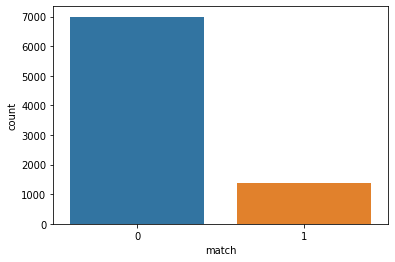

In [4]:
sns.countplot(df['match'])

In [5]:
df = df.replace('?', np.nan)
missing = df.isna().sum(axis=0)
missing[missing > 0]

age                                95
age_o                             104
race                               63
race_o                             73
importance_same_race               79
importance_same_religion           79
field                              63
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive                        105
sincere     

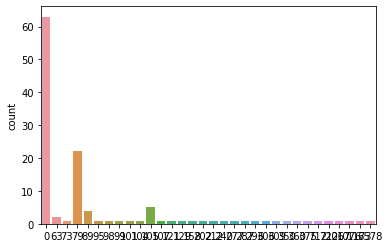

In [6]:
missing = df.isna().sum(axis=0)
sns.countplot(missing)

In [7]:
df = df.dropna(axis=1, thresh=8000)
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,NaN,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [8]:
missing = df.isna().sum(axis=0)
missing[missing > 0]

age                               95
age_o                            104
race                              63
race_o                            73
importance_same_race              79
importance_same_religion          79
field                             63
pref_o_attractive                 89
pref_o_sincere                    89
pref_o_intelligence               89
pref_o_funny                      98
pref_o_ambitious                 107
pref_o_shared_interests          129
attractive_o                     212
sinsere_o                        287
intelligence_o                   306
funny_o                          360
attractive_important              79
sincere_important                 79
intellicence_important            79
funny_important                   89
ambtition_important               99
shared_interests_important       121
attractive                       105
sincere                          105
intelligence                     105
funny                            105
a

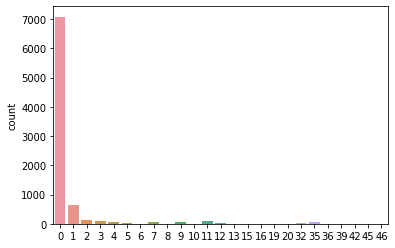

In [9]:
missing = df.isna().sum(axis=1)
sns.countplot(missing)

In [10]:
df = df.dropna(axis=0, thresh=115)

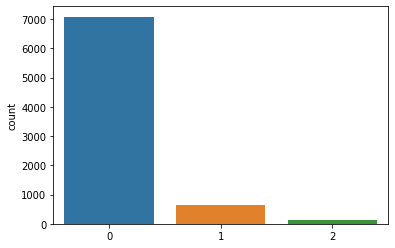

In [11]:
missing = df.isna().sum(axis=1)
sns.countplot(missing)

In [12]:
df = df.drop('has_null',1)
df = df.dropna(axis=1)

In [13]:
df.columns

Index(['wave', 'gender', 'd_age', 'd_d_age', 'race', 'race_o', 'samerace',
       'importance_same_race', 'importance_same_religion',
       'd_importance_same_race', 'd_importance_same_religion', 'field',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'd_pref_o_attractive',
       'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny',
       'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_attractive_o',
       'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o',
       'd_shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'd_attractive_important', 'd_sincere_important',
       'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'attractive',
       'sincere', 'intelligence', 'funny', 'ambition', 'd_attractive',
       'd_sincere', 'd_intelli

In [14]:
df['field'] = df['field'].str.lower()
df['field'] = df['field'].str.replace('\'', '')

val_cnts = df['field'].value_counts()
others = val_cnts[val_cnts < 20].index

df.loc[df['field'].isin(others), 'field'] = 'other'

In [15]:
df['race'] = df['race'].str.lower()
df['race'] = df['race'].str.replace('\'', '')
df['race'].value_counts()

european/caucasian-american              4461
asian/pacific islander/asian-american    1889
latino/hispanic american                  624
other                                     504
black/african american                    371
Name: race, dtype: int64

In [16]:
df['race_o'] = df['race_o'].str.lower()
df['race_o'] = df['race_o'].str.replace('\'', '')
df['race_o'].value_counts()

european/caucasian-american              4448
asian/pacific islander/asian-american    1884
latino/hispanic american                  633
other                                     501
black/african american                    383
Name: race_o, dtype: int64

In [17]:
dummies = pd.get_dummies(df['field'], prefix='field')
df = pd.concat([df, dummies], axis=1)
df = df.drop('field',1)

In [18]:
dummies = pd.get_dummies(df['race'], prefix='race')
df = pd.concat([df, dummies], axis=1)
df = df.drop('race',1)

In [19]:
dummies = pd.get_dummies(df['race_o'], prefix='race_o')
df = pd.concat([df, dummies], axis=1)
df = df.drop('race_o',1)

In [20]:
dummies = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, dummies], axis=1)
df = df.drop('gender',1)

In [21]:
df.head()

,wave,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,...,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,gender_female,gender_male
0,1,6,[4-6],0,2,4,[2-5],[2-5],35,20,...,0,0,0,0,0,1,0,0,1,0
1,1,1,[0-1],0,2,4,[2-5],[2-5],60,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,[0-1],1,2,4,[2-5],[2-5],19,18,...,0,0,0,1,0,0,0,0,1,0
3,1,2,[2-3],0,2,4,[2-5],[2-5],30,5,...,0,0,0,0,0,1,0,0,1,0
4,1,3,[2-3],0,2,4,[2-5],[2-5],30,10,...,0,0,0,0,0,0,1,0,1,0


In [22]:
split_features = ['d_age','importance_same_race','importance_same_religion','pref_o_attractive','pref_o_sincere',
          'pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests','attractive_o',
          'sinsere_o','intelligence_o','funny_o','ambitous_o','shared_interests_o','attractive_important',
          'sincere_important','intellicence_important','funny_important','ambtition_important',
          'shared_interests_important','attractive','sincere','intelligence','funny','ambition','attractive_partner',
          'sincere_partner','intelligence_partner','funny_partner','ambition_partner','shared_interests_partner',
          'tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',
          'movies','concerts','music','shopping','yoga','interests_correlate','expected_happy_with_sd_people',
          'expected_num_interested_in_me','expected_num_matches','like','guess_prob_liked', 'sports']

d_split_features = ['d_'+ x for x in split_features]

In [23]:
df_num = df.copy()
df_num = df_num.drop(columns=[col for col in df if col in d_split_features])
df_num.head()

,wave,d_age,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,gender_female,gender_male
0,1,6,0,2,4,35,20,20,20,0,...,0,0,0,0,0,1,0,0,1,0
1,1,1,0,2,4,60,0,0,40,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,2,4,19,18,19,18,14,...,0,0,0,1,0,0,0,0,1,0
3,1,2,0,2,4,30,5,15,40,5,...,0,0,0,0,0,1,0,0,1,0
4,1,3,0,2,4,30,10,20,10,10,...,0,0,0,0,0,0,1,0,1,0


In [24]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7849 entries, 0 to 8377
Columns: 143 entries, wave to gender_male
dtypes: int64(6), object(35), uint8(102)
memory usage: 3.3+ MB


In [25]:
for c in df_num.columns:
    df_num[c] = pd.to_numeric(df_num[c])


In [26]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7849 entries, 0 to 8377
Columns: 143 entries, wave to gender_male
dtypes: float64(11), int64(30), uint8(102)
memory usage: 3.3 MB


In [35]:
df_num.to_csv('../data/speeddating/speeddating_num.csv', index=False)

In [28]:
df.head()

,wave,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,...,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,gender_female,gender_male
0,1,6,[4-6],0,2,4,[2-5],[2-5],35,20,...,0,0,0,0,0,1,0,0,1,0
1,1,1,[0-1],0,2,4,[2-5],[2-5],60,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,[0-1],1,2,4,[2-5],[2-5],19,18,...,0,0,0,1,0,0,0,0,1,0
3,1,2,[2-3],0,2,4,[2-5],[2-5],30,5,...,0,0,0,0,0,1,0,0,1,0
4,1,3,[2-3],0,2,4,[2-5],[2-5],30,10,...,0,0,0,0,0,0,1,0,1,0


In [29]:
df_cat = df.copy()
df_cat = df_cat.drop(columns=[col for col in df if col in split_features])
df_cat.head()

,wave,d_d_age,samerace,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,...,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,gender_female,gender_male
0,1,[4-6],0,[2-5],[2-5],[21-100],[16-20],[16-20],[16-20],[0-15],...,0,0,0,0,0,1,0,0,1,0
1,1,[0-1],0,[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],...,0,0,0,0,0,1,0,0,1,0
2,1,[0-1],1,[2-5],[2-5],[16-20],[16-20],[16-20],[16-20],[0-15],...,0,0,0,1,0,0,0,0,1,0
3,1,[2-3],0,[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],...,0,0,0,0,0,1,0,0,1,0
4,1,[2-3],0,[2-5],[2-5],[21-100],[0-15],[16-20],[0-15],[0-15],...,0,0,0,0,0,0,1,0,1,0


In [30]:
def ordinal_enc(col):
    enc_arr = col.unique()
    enc_arr.sort()

    mapping = {}
    for i, enc in enumerate(enc_arr):
        mapping[enc] = i

    return col.replace(mapping)


In [31]:
for col in d_split_features:
    if col in df_cat.columns:
        df_cat[col] = ordinal_enc(df_cat[col])


In [32]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7849 entries, 0 to 8377
Columns: 162 entries, wave to gender_male
dtypes: int64(60), uint8(102)
memory usage: 4.4 MB


In [33]:
df_cat.to_csv('../data/speeddating/speeddating_cat.csv', index=False)

In [34]:
df_cat.head()

,wave,d_d_age,samerace,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,...,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,gender_female,gender_male
0,1,2,0,1,1,2,1,1,1,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,1,1,2,0,0,2,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,1,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,0,1,1,2,0,0,2,0,...,0,0,0,0,0,1,0,0,1,0
4,1,1,0,1,1,2,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
